# Week 5: Rossby waves
*MAQ - 32806, Chiel van Heerwaarden, Imme Benedict, and Menno Veerman, 2020*

In this assignment you will study the properties of Rossby waves. For this, you will analyze a month of ECMWF ERA-Interim data from February 2015.

___
First, we load the required packages.

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scipy cartopy netCDF4

# Loading the packages.
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
import datetime                 # Datetime is a package to deal with dates.
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LinearSegmentedColormap
from ipywidgets import interact, interact_manual

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 11})          # Set the standard font size of the plots to 11pt.
plt.rcParams.update({'figure.figsize': [13,5]}) # Set the standard figure size.

___
# Setting up a Python and reading out the required data
With the code below, you initialize the world map with the desired coordinates.

In [3]:
# We define a map of the northern hemisphere that is stored in the m object.
lon_start =  -180.
lon_end   =   180.
lat_start =     0.
lat_end   =    85.

___

Now, you load the data and read out the desired variables from a NetCDF file from the ECMWF ERA-Interim data archive.

In [4]:
nc_file = nc.Dataset("shared/era_data2.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]

nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

u   = np.roll(nc_file.variables["u"][:,:,:], nroll, -1)
v   = np.roll(nc_file.variables["v"][:,:,:], nroll, -1)
Phi = np.roll(nc_file.variables["z"][:,:,:], nroll, -1)
T   = np.roll(nc_file.variables["t"][:,:,:], nroll, -1)

time = np.arange(0, 28, 0.25)

nc_file.close()

def get_time_index(time_plot):
    return abs(time-time_plot).argmin()

def get_lat_index(lat_plot):
    return abs(lat-lat_plot).argmin()

def get_lon_index(lon_plot):
    if(lon_plot > 180.):
        lon_plot = lon_plot - 360.
    return abs(lon-lon_plot).argmin()

___
# The time evolution of temperature, geopotential and meridional wind
As a starting point you find below the temperature and geopotential at 500 hPa. With the slider above the plot you can change the time. If you click on the slider, you can change the time with the left and right arrow keys.

In [5]:
Phi_range = np.arange(50000, 100000, 1000)
T_range = np.arange(220, 275, 2.5)

def plot_T_map(t=2.5):
    nt = abs(time-t).argmin()

    my_projection = ccrs.PlateCarree(central_longitude=0)

    fig1 = plt.figure()
    ax1 = plt.subplot(111, projection=my_projection)

    ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

    ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
    ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    cb = ax1.contourf(lon, lat, T[nt,:,:], T_range, cmap=plt.cm.inferno) # We plot a colormesh using the gist_ncar colormap.
    #fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
    cz = ax1.contour(lon, lat, Phi[nt,:,:], Phi_range, colors='w', linewidths=1.5) # We plot the geopotential in contours.
    ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
    ax1.set_title('T and $\Phi$ at p = 500 hPa, t = {0} d, index = {1}'.format(t, nt));
    ax1.set_xlim(lon_start, lon_end)
    ax1.set_ylim(lat_start, lat_end)
    fig1.tight_layout()
    
interact_manual(plot_T_map, t=(0, 28.75, 0.25));

interactive(children=(FloatSlider(value=2.5, description='t', max=28.75, step=0.25), Button(description='Run I…

In [7]:
v_range = np.linspace(-60., 60., 24)

def plot_v_map(t=2.5):
    nt = abs(time-t).argmin()
    
    my_projection = ccrs.PlateCarree(central_longitude=0)

    fig1 = plt.figure()
    ax1 = plt.subplot(111, projection=my_projection)

    ax1.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

    ax1.set_xticks(np.arange(-180, 181, 30), crs=my_projection)
    ax1.set_yticks(np.arange(-90, 91, 30), crs=my_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    cb = ax1.contourf(lon, lat, v[nt,:,:], v_range, cmap=plt.cm.seismic) # We plot a colormesh using the gist_ncar colormap.
    #fig1.colorbar(cb) # We add a colorbar to show the values of temperature.
    cz = ax1.contour(lon, lat, Phi[nt,:,:], 15, colors='k', linewidths=1.5) # We plot the geopotential in contours.
    ax1.clabel(cz, fmt='%1.0f', fontsize=10.) # We add labels to the contour lines.
    ax1.set_title('v and $\Phi$ at p = 500 hPa, t = {0} d, index = {1}'.format(t, nt));
    ax1.set_xlim(lon_start, lon_end)
    ax1.set_ylim(lat_start, lat_end)
    fig1.tight_layout()

interact(plot_v_map, t=(0, 28.75, 0.25));

interactive(children=(FloatSlider(value=2.5, description='t', max=28.75, step=0.25), Output()), _dom_classes=(…

1. Analyze the time evolution of the geopotential and temperature. Can you recognize Rossby waves in the field? Which direction do they travel?
2. Which latitude is the approximate axis (center line) of the Rossby waves?
3. What do you observe around the Rocky Mountains at approximately 120 W? Can you link this observation with the conservation of shallow water (or Rossby) potential vorticity $\left( \zeta + f \right) / h$?
___

# From signal to noise: averaging over a latitude band
To be able to analyze the wave behavior the best, you will average the data over a latitude band. Below you find a figure that contains a plot of the geopotential $\Phi$ and the meridional velocity $v$.

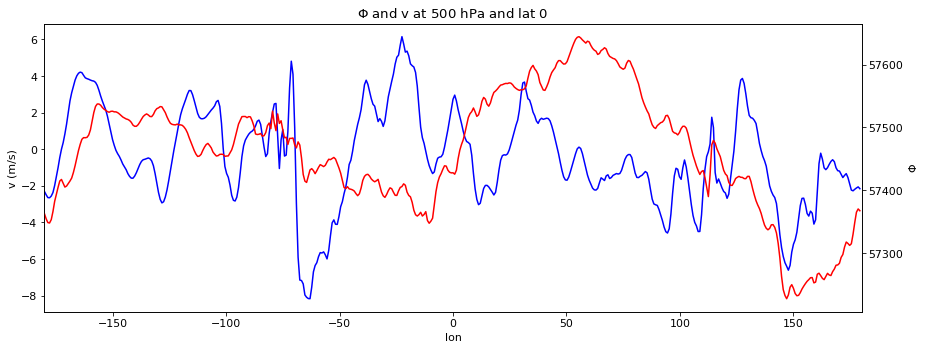

In [7]:
# Fill in below the latitude that you find most appropriate as the axis of the Rossby waves.
# The default value of 0 point to the equator and is therefore NOT correct.
# Choose a time step that you consider to have a clear signal.
lat_axis = 0.
time_step = 0.25

j_lat = get_lat_index(lat_axis)
nt = get_time_index(time_step)

fig1 = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(lon, v[nt,j_lat,:], 'b-')
ax1.set_xlabel('lon')
ax1.set_ylabel('v (m/s)')
ax2 = ax1.twinx()
ax2.plot(lon, Phi[nt,j_lat,:], 'r-')
ax2.set_xlim(-180., 180)
ax2.set_ylabel('$\Phi$')
ax2.set_title('$\Phi$ and v at 500 hPa and lat {0:.0f}'.format(lat[j_lat]))
fig1.tight_layout()

Now, you are going to replot this data, but with a smoothing over 30 degrees in order to contain the large part of the meridional extent of the Rossby wave in your line.

In [8]:
j_lat_lo = get_lat_index(lat_axis - 15.)+1
j_lat_hi = get_lat_index(lat_axis + 15.)

v_avg   = np.mean(v  [:,j_lat_hi:j_lat_lo,:], axis=1)
u_avg   = np.mean(u  [:,j_lat_hi:j_lat_lo,:], axis=1)
Phi_avg = np.mean(Phi[:,j_lat_hi:j_lat_lo,:], axis=1)

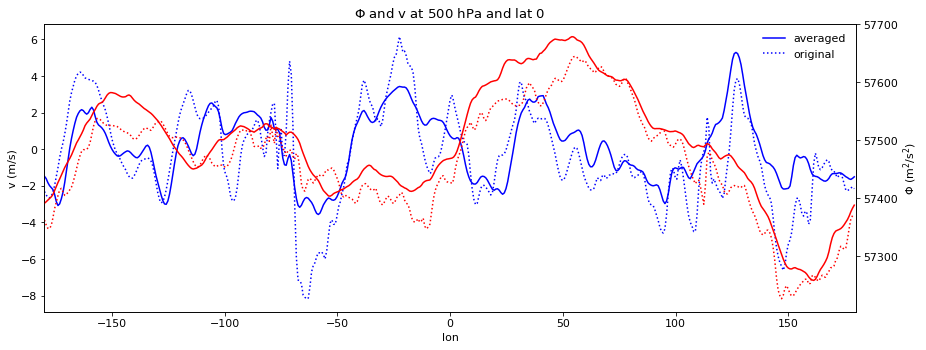

In [9]:
fig1 = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(lon, v_avg[nt,:], 'b-', label='averaged')
ax1.plot(lon, v[nt,j_lat,:], 'b:', label='original')
ax1.set_xlabel('lon')
ax1.set_ylabel('v (m/s)')
ax1.legend(loc=0, frameon=False)
ax2 = ax1.twinx()
ax2.plot(lon, Phi_avg[nt,:], 'r-', label='avg')
ax2.plot(lon, Phi[nt,j_lat,:], 'r:', label='orig')
ax2.set_xlim(-180., 180)
ax2.set_ylabel('$\Phi$ (m$^2$/s$^2$)')
ax2.set_title('$\Phi$ and v at 500 hPa and lat {0:.0f}'.format(lat[j_lat]))
fig1.tight_layout()

1. Set the variable `lat_axis` to the latitude that you have chosen to be the wave axis and the variable `time_step` to a chosen moment in time. Does the signal at your chosen latitude and time has has a clear wave pattern? Which wave numbers (you have to make a best guess here) dominate most to the signal? You can express the wave numbers in number of waves per earth circumference at your chosen latitude.
2. What remains of the pattern after averaging? What does that tell you about Rossby waves?
3. Are the time signals of $\Phi$ and $v$ in phase or out of phase? Can you explain that?
___

# The Hovmuller diagram: visualisation of the propagation of systems
In 1949, Hovmuller found an innovative way of plotting the time evolution of variables. He made contour plots of variables with longitude and time on the two axes. Below, you find a Hovmuller diagram of the meridional velocity at 500 hPa at your chosen latitude. Take your time to study this plot and to understand what it represents. 

To aid the visual interpretation, the line that is returned by the `get_advection_line` function shows the transport of air parcels by the zonal velocity $u$. This allows you to compare wave speed to wind speed. You can add as many lines as you want by copying the line

`pl.plot(*get_advection_line(0., 10., 'ko-'))`

with the desired longitude as the first argument and the desired time (in days) as the second argument.



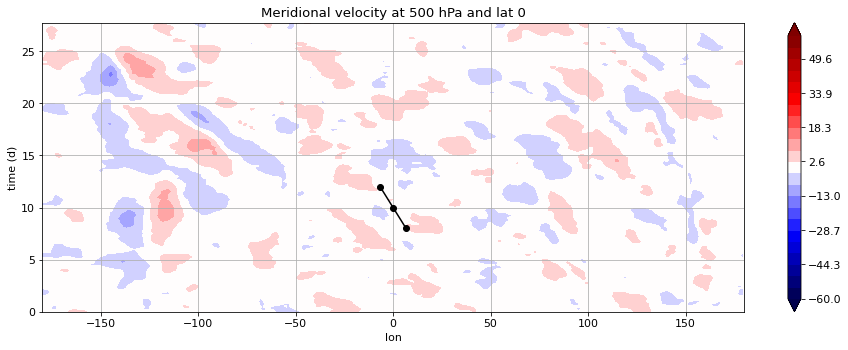

In [10]:
def get_advection_line(lon_u, t_u, linestyle):
    i_lon_u = get_lon_index(lon_u)
    n_t_u = get_time_index(t_u)
    dt_days = 2.
    a = 6.37e6
    u_avg_lon = u_avg[n_t_u, i_lon_u]
    dx_avg_lon = u_avg_lon * dt_days * 86400.
    dlon_rad = dx_avg_lon / (a * np.cos(np.deg2rad(lat[j_lat])))
    dlon = np.rad2deg(dlon_rad)
    
    t_u_x = np.array([lon[i_lon_u] - dlon, lon[i_lon_u], lon[i_lon_u] + dlon])
    t_u_y = np.array([t_u - dt_days, t_u, t_u + dt_days])
    
    return t_u_x, t_u_y, linestyle

fig1 = plt.figure()
ax1 = plt.subplot(111)
cf = ax1.contourf(lon, time, v_avg, v_range, cmap=plt.cm.seismic, extend='both')
fig1.colorbar(cf)
ax1.plot(*get_advection_line(0., 10., 'ko-'))
ax1.set_xlabel('lon')
ax1.set_ylabel('time (d)')
ax1.set_xlim(-180, 180)
ax1.set_title('Meridional velocity at 500 hPa and lat {0:.0f}'.format(lat[j_lat]))
ax1.grid()
fig1.tight_layout()

1. What are the dominant patterns that you observe in this plot? Can you distinguish small and large waves in here?
2. Which of the observations you made in the global maps can you find back in this figure? What happens around the Rocky Mountains? What happens in Western Europe?
3. Do the waves travel in the same direction as the mean wind? Do they travel faster or slower? Test this at multiple locations, for instance near the Rocky Mountains, over the Atlantic and over the European main land.
4. Can you relate the previous observations to the dispersion relation for Rossby waves?
___

# Using Fourier analysis study waves of different size separately
In signals that are dominated by a wide range of spatio-temporal scales, it is often hard to distinguish the behavior of large and smaller systems from each other in a plot. To be able to visualize these differences, spectral analysis is a widely used technique. In this technique, the signal is transformed into the so-called Fourier space. According to the theory, every periodic signal can be split into a sum of waves of integer wave numbers. We use here a Fast-Fourier transform. (See https://en.wikipedia.org/wiki/Fast_Fourier_transform if you are interested in the theory).

Below, we calculate the Fourier transform for $v$ and $\Phi$, and calculate the spectral energy. The spectral energy is the contribution of fluctations of different wave numbers to the total variance of the signal.

In [11]:
v_fft = np.fft.rfft(v_avg, axis=1)
v_fft_energy = abs(v_fft / lon.size)**2
v_fft_energy[1:-1] *= 2.

Phi_fft = np.fft.rfft(Phi_avg, axis=1)
Phi_fft_energy = abs(Phi_fft / lon.size)**2
Phi_fft_energy[1:-1] *= 2.

We can visualize the spectral energy. Below you find a plot with on the horizontal axis the wave numbers (expressed in how often a wave fits around the earth), and on the vertical axis the contribution of each wave to the variance of the signal. The area under the graph integrates to the total variance of the signal.

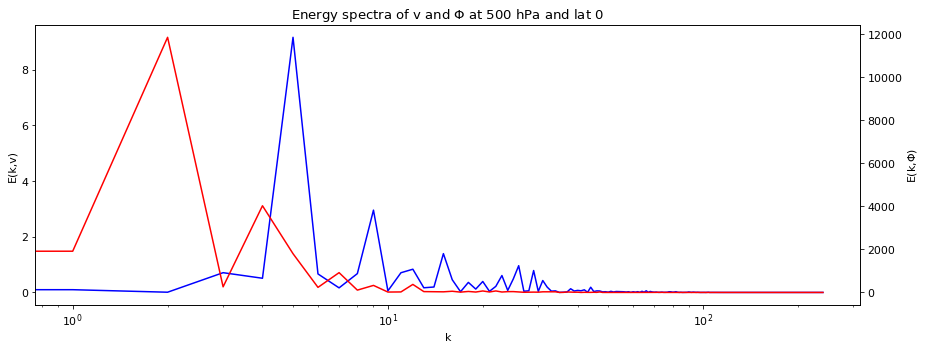

In [12]:
k = np.arange(lon.size/2+1)
fig1 = plt.figure()
ax1 = plt.subplot(111)
ax1.semilogx(k, k*v_fft_energy[nt,:], 'b-');
ax1.set_xlabel('k')
ax1.set_ylabel('E(k,v)')
ax2 = ax1.twinx()
ax2.semilogx(k, k*Phi_fft_energy[nt,:], 'r-');
ax2.set_ylabel('E(k,$\Phi$)')
ax2.set_title('Energy spectra of v and $\Phi$ at 500 hPa and lat {0:.0f}'.format(lat[j_lat]))
fig1.tight_layout()

1. Which are the dominant wave number ranges in the signals of $v$ and $\Phi$? 
2. Are there differences between the two signals? What is the reason for the differences?
3. Do the peaks in the graph match with what you observed in the maps?
___

# Filtering the data to see individual waves
The nice thing about spectral analysis, is that it allows for studying individual waves, or a chosen range. In the code below, you can use the array `k_filter` to switch chosen wave numbers on by setting the value corresponding to a specific wave number to `1`. In the plot below, you can observe how well the original signal is represented, and how the Hovmuller diagram looks for the chosen wave number range.

In [13]:
k_filter = np.zeros(v_fft.shape[1])
k_filter[0] = 1.  # Use wave number 0, which is the mean, do not set this one to zero.

#k_filter[:]    = 1.  # Use all waves.
#k_filter[1:7] = 1.  # Use only wave numbers 1 to 7.

v_fft_k = v_fft.copy() * k_filter[np.newaxis,:]
v_k = np.fft.irfft(v_fft_k, axis=1)

Phi_fft_k = Phi_fft.copy() * k_filter[np.newaxis,:]
Phi_k = np.fft.irfft(Phi_fft_k, axis=1)

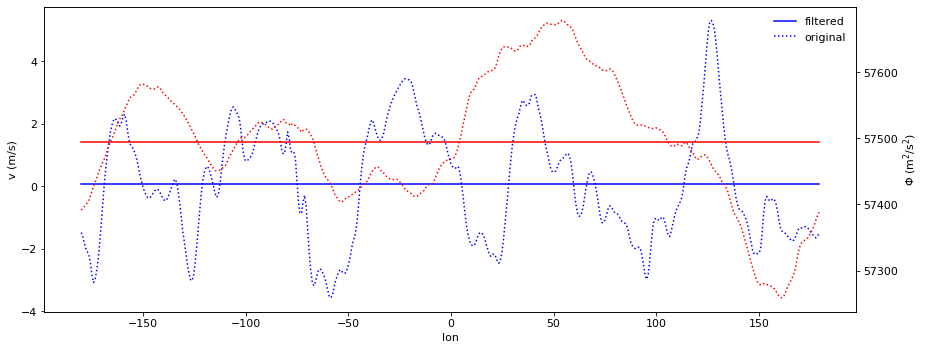

In [14]:
fig1 = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(lon, v_k[nt,:], 'b-', label='filtered')
ax1.plot(lon, v_avg[nt,:], 'b:', label='original')
ax1.legend(loc=0, frameon=False)
ax1.set_xlabel('lon')
ax1.set_ylabel('v (m/s)')
ax2 = ax1.twinx()
ax2.plot(lon, Phi_k[nt,:], 'r-')
ax2.plot(lon, Phi_avg[nt,:], 'r:')
ax2.set_xlabel('lon')
ax2.set_ylabel('$\Phi$ (m$^2$/s$^2$)')
fig1.tight_layout()

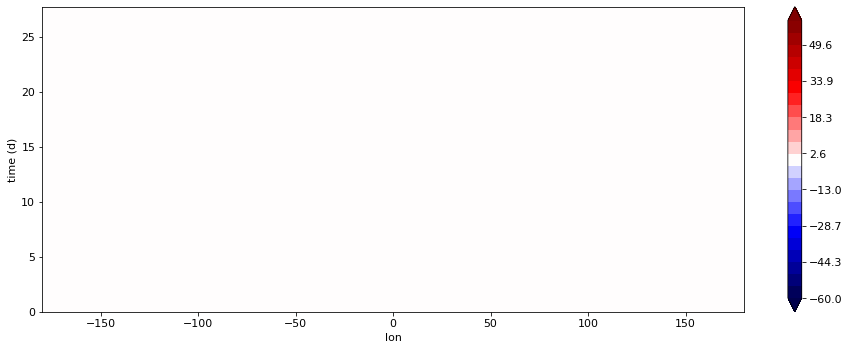

In [15]:
fig1 = plt.figure()
ax1 = plt.subplot(111)
cf = ax1.contourf(lon, time, v_k, v_range, cmap=plt.cm.seismic, extend='both')
fig1.colorbar(cf)
ax1.set_xlabel('lon')
ax1.set_ylabel('time (d)')
ax1.set_xlim(-180, 180)
fig1.tight_layout()

1. Filter the data such that only the first peak you observed in the spectra is in the signal (TIP: do not forget the mean). How well are the signals of $v$ and $\Phi$ represented? What does that tell you about the importance of large-scale waves?
2. How does the Hovmuller diagram look if only the large waves are included?
3. Repeat the first two questions, but now remove the large waves from the signal and only retain the smaller waves. What do you observe and how do the plots differ?
4. Does this exercise confirm your previous answer on the link between the Hovmuller diagrams and the dispersion relation of Rossby waves?

___
Work out your assignment below.
___